In [1]:
import os
import pandas as pd

humans=os.listdir("human_evaluation")
humans=[human for human in humans if ".csv" not in human]
humans=["Rajashree"]

filenames=["lecture.csv","homework_guidance.csv","homework_clarification.csv"]
human={}
for each_human in humans:
    human[each_human]={}
    for each_file in filenames:
        data=pd.read_csv("human_evaluation/"+each_human+"/"+each_file)
        human[each_human][each_file.replace(".csv","")]=data
    

In [8]:
for key,values in human.items():
    for _,value in values.items():
        print(type(value))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [2]:
lecture=pd.DataFrame()
guidance=pd.DataFrame()
clarification=pd.DataFrame()
for human in humans:
    lec=pd.read_csv(f"human_evaluation/{human}/lecture.csv")
    lecture=pd.concat([lecture, lec], ignore_index=True)
for human in humans:
    gui=pd.read_csv(f"human_evaluation/{human}/homework_guidance.csv")
    guidance=pd.concat([guidance, gui], ignore_index=True)

for human in humans:
    cla=pd.read_csv(f"human_evaluation/{human}/homework_clarification.csv")
    clarification=pd.concat([clarification, cla], ignore_index=True)
print(clarification.head())

                                          true_roles  \
0  ["Providing Homework Guidance","Homework Quest...   
1                ["Homework Question Clarification"]   
2                ["Homework Question Clarification"]   
3  ["Providing Homework Guidance","Homework Quest...   
4                ["Homework Question Clarification"]   

                              objectives  \
0                  without homework hint   
1  with homework hint and homework index   
2  with homework hint and homework index   
3                  without homework hint   
4  with homework hint and homework index   

                                     actual_question  \
0  True/False Computer forensics is the retrieval...   
1  True/False Computer forensics is the retrieval...   
2  True/False Computer forensics is the retrieval...   
3  The word ________ means “suitable for court.” ...   
4  The word ________ means “suitable for court.” ...   

                                        llama_answer  \
0  Th

In [10]:
len(guidance),len(lecture),len(clarification)

(37, 52, 33)

<Figure size 2000x1200 with 0 Axes>

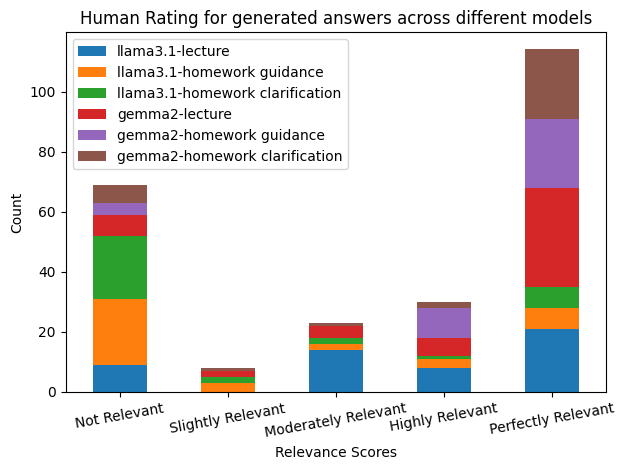

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scores=["Not Relevant","Slightly Relevant","Moderately Relevant","Highly Relevant","Perfectly Relevant"]
# Count the occurrences of each evaluation for both models
llama_lec_counts = lecture['evaluation_llama'].value_counts()
llama_lec_counts = llama_lec_counts.reindex(scores, fill_value=0)

llama_gui_counts=guidance['evaluation_llama'].value_counts()
llama_gui_counts = llama_gui_counts.reindex(scores, fill_value=0)

llama_clar_counts=clarification['evaluation_llama'].value_counts()
llama_clar_counts = llama_clar_counts.reindex(scores, fill_value=0)


# Sort the counts based on the defined order
gemma_lec_counts = lecture['evaluation_gemma'].value_counts()
gemma_lec_counts = gemma_lec_counts.reindex(scores, fill_value=0)


gemma_gui_counts=guidance['evaluation_gemma'].value_counts()
gemma_gui_counts = gemma_gui_counts.reindex(scores, fill_value=0)

gemma_clar_counts=clarification['evaluation_gemma'].value_counts()
gemma_clar_counts = gemma_clar_counts.reindex(scores, fill_value=0)


# Create a combined DataFrame for easier plotting
combined_counts = pd.DataFrame({
    'llama3.1 lecture': llama_lec_counts,
    'llama3.1 hw  guidance': llama_gui_counts,
    'llama3.1 hw clarification':llama_clar_counts,
    'gemma2 lecture':gemma_lec_counts,
    'gemma2 hw guidance':gemma_gui_counts,
    'gemma2 hw clarification':gemma_clar_counts
}).fillna(0)

# Reset index to have categories as a column
combined_counts.reset_index(inplace=True)
# print(combined_counts)
combined_counts.columns = ['Evaluation', 'llama3.1-lecture', 'llama3.1-homework guidance','llama3.1-homework clarification','gemma2-lecture','gemma2-homework guidance','gemma2-homework clarification']
# Plotting
plt.figure(figsize=(20, 12))
combined_counts.set_index('Evaluation').plot(kind='bar', stacked=True)
plt.title('Human Rating for generated answers across different models')
plt.xlabel('Relevance Scores')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig("Figures/human_evaluation_relevancy2.png")
plt.show()

In [4]:
all_df=pd.DataFrame()
all_df=pd.concat([lecture, clarification,guidance], ignore_index=True)
all_df['objectives'] = all_df['objectives'].fillna("syllabus")
hint_categories=['syllabus','without lecture hint','with lecture hint','with lecture hint and lecture index','without homework hint','with homework hint','with homework hint and homework index']

# Count the occurrences of each evaluation for LLaMA and Gemma, and reindex
def count_evaluations(df, column_name):
    counts = df[column_name].value_counts().reindex(scores, fill_value=0)
    return counts



In [31]:
hint_categories

['syllabus',
 'without lecture hint',
 'with lecture hint',
 'with lecture hint and lecture index',
 'without homework hint',
 'with homework hint',
 'with homework hint and homework index']

In [6]:
hint_categories[4:]

['without homework hint',
 'with homework hint',
 'with homework hint and homework index']

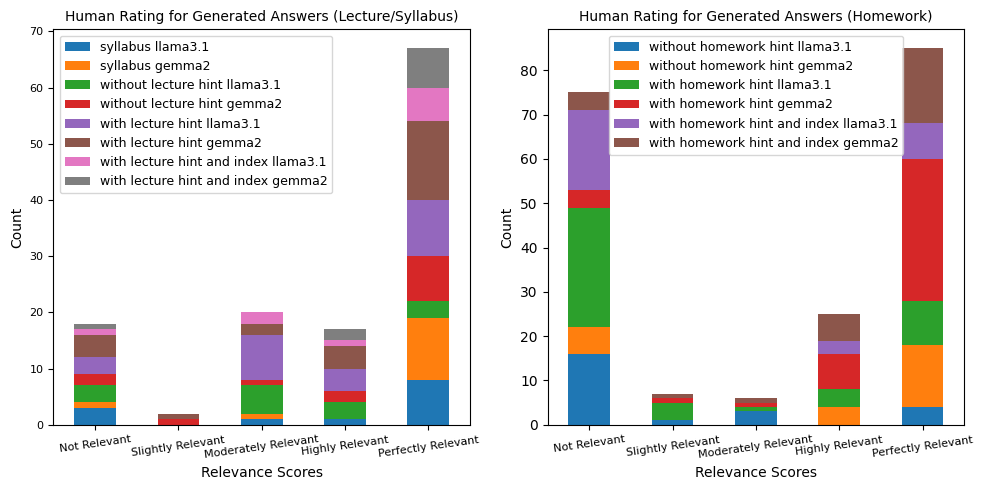

In [5]:
# Create a dictionary to hold counts for each combination
combined_counts_dict_lecture = {}
combined_counts_dict_homework = {}

# Loop through each hint category and model for lecture
for hint in hint_categories[:4]:  # First two are lecture-related
    for model in ['llama', 'gemma']:
        filtered_df = all_df[all_df['objectives'].str.contains(hint, na=False)]
        combined_counts_dict_lecture[f"{hint} {model}"] = count_evaluations(filtered_df, f'evaluation_{model}')

# Convert the dictionary to a DataFrame for lecture-related evaluations
combined_counts_lecture = pd.DataFrame(combined_counts_dict_lecture).fillna(0)
combined_counts_lecture.reset_index(inplace=True)
combined_counts_lecture.columns = ['Evaluation'] + [f'{hint} {model}' for hint in hint_categories[:4] for model in ['llama3.1', 'gemma2']]
combined_counts_lecture.columns=[i.replace("and lecture","and") for i in combined_counts_lecture.columns]


# Loop through each hint category and model for homework
for hint in hint_categories[4:]:  # Last two are homework-related
    for model in ['llama', 'gemma']:
        filtered_df = all_df[all_df['objectives'].str.contains(hint, na=False)]
        combined_counts_dict_homework[f"{hint} {model}"] = count_evaluations(filtered_df, f'evaluation_{model}')

# Convert the dictionary to a DataFrame for homework-related evaluations
combined_counts_homework = pd.DataFrame(combined_counts_dict_homework).fillna(0)
combined_counts_homework.reset_index(inplace=True)
combined_counts_homework.columns = ['Evaluation'] + [f'{hint} {model}' for hint in hint_categories[4:] for model in ['llama3.1', 'gemma2']]
combined_counts_homework.columns=[i.replace("and homework","and") for i in combined_counts_homework.columns]
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for lecture-related evaluations
combined_counts_lecture.set_index('Evaluation').plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Human Rating for Generated Answers (Lecture/Syllabus)',fontsize=10)
axs[0].set_xlabel('Relevance Scores',fontsize=10)
axs[0].set_ylabel('Count',fontsize=10)
axs[0].tick_params(axis='x', rotation=8,labelsize=8)
axs[0].tick_params(axis='y',labelsize=8)

axs[0].legend(title='', loc='upper left',fontsize=9)

# Plot for homework-related evaluations
combined_counts_homework.set_index('Evaluation').plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Human Rating for Generated Answers (Homework)',fontsize=10)
axs[1].set_xlabel('Relevance Scores',fontsize=10)
axs[1].set_ylabel('Count',fontsize=10)
axs[1].tick_params(axis='x', rotation=8,labelsize=8)
axs[1].legend(title='', loc='upper center',fontsize=9)
axs[1].tick_params(axis='y',labelsize=10)

plt.tight_layout()
plt.savefig("Figures/human_evaluation_relevancy_objectives2.png")
plt.show()